# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/usr/local/mxnet/CarND-Traffic-Signs/train.p'
testing_file = '/usr/local/mxnet/CarND-Traffic-Signs/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
count=dict()
for i in range(len(y_test)):
    count[y_test[i]]=count.get(y_test[i],0)+1
n_classes = len(count)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

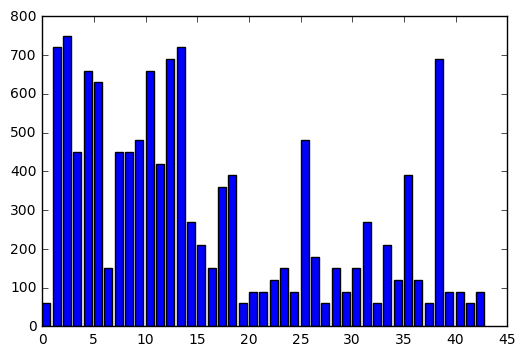

25

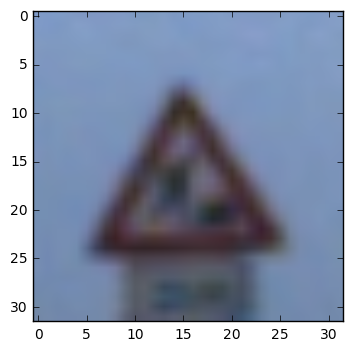

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.bar(range(len(count)),count.values())
plt.show()
c=29100
plt.imshow(X_train[c])
y_train[c]

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
import os
os.sys.path

['',
 '/home/admin/anaconda3/lib/python35.zip',
 '/home/admin/anaconda3/lib/python3.5',
 '/home/admin/anaconda3/lib/python3.5/plat-linux',
 '/home/admin/anaconda3/lib/python3.5/lib-dynload',
 '/home/admin/anaconda3/lib/python3.5/site-packages',
 '/home/admin/anaconda3/lib/python3.5/site-packages/Sphinx-1.4.6-py3.5.egg',
 '/home/admin/anaconda3/lib/python3.5/site-packages/setuptools-27.2.0-py3.5.egg',
 '/home/admin/anaconda3/lib/python3.5/site-packages/IPython/extensions',
 '/home/admin/.ipython']

In [5]:
import sys
sys.path.append('/home/admin/anaconda3/envs/cv/lib/python3.5/site-packages')

In [6]:
import cv2
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [7]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

In [26]:
#Data pre-processing: grayscale, normalization, shuffle
import numpy as np
m_train=0
m_test=0
for i in range(len(X_train)):
    m_train+=np.mean(grayscale(X_train[i]))
for j in range(len(X_test)):
    m_test+=np.mean(grayscale(X_test[j]))
norm=(m_test+m_train)/(len(X_test)+len(X_train))
N_train=np.ndarray(shape=[len(X_train),32,32], dtype='int16')
N_test=np.ndarray(shape=[len(X_test),32,32], dtype='int16')
for i in range(len(X_train)):
    N_train[i]=grayscale(X_train[i])-norm
for j in range(len(X_test)):
    N_test[j]=grayscale(X_test[j])-norm
train_data, train_labels=randomize(N_train, y_train)

In [27]:
print(norm)

81.7486246479


In [9]:
train_label=(np.arange(n_classes) == train_labels[:,None]).astype(np.float32)
test_label=(np.arange(n_classes) == y_test[:,None]).astype(np.float32)

In [10]:
train_dataset=np.ndarray(shape=(n_train, 32, 32, 1), dtype=np.float32)
for i in range(n_train):
    train_dataset[i,:,:,0]=train_data[i]

In [11]:
test_dataset=np.ndarray(shape=(n_test, 32, 32, 1), dtype=np.float32)
for i in range(n_test):
    test_dataset[i,:,:,0]=N_test[i]

In [12]:
#TODO: split to validation
val_label=train_label[0:3000,:]
val_dataset=train_dataset[0:3000,:,:,:]

In [12]:
#plt.imshow(train_data[21], cmap='gray')
#train_label[21]

In [13]:
#num_steps=20000
epochs=100
batch_size=128

In [14]:
import tensorflow as tf

In [15]:
#Graph & Model
graph = tf.Graph()
with graph.as_default():
    
    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(None, 32, 32, 1))
    tf_train_labels = tf.placeholder(tf.float32, shape=(None, n_classes))
    keep_prob = tf.placeholder(tf.float32)
    global step
    starter_learning_rate = 0.0001
    #learning_rate = tf.train.exponential_decay(starter_learning_rate, step, num_steps, 0.96, staircase=False)
    learning_rate=starter_learning_rate
    
    #Variables
    weights = {
    'wc1': tf.Variable(tf.truncated_normal([3, 3, 1, 64], stddev=0.01)),
    'wc2': tf.Variable(tf.truncated_normal([3, 3, 64, 128], stddev=0.01)),
    'wc3': tf.Variable(tf.truncated_normal([3, 3, 128, 256], stddev=0.01)),
    'wd1': tf.Variable(tf.truncated_normal([256, 1024], stddev=0.01)),
    'wd2': tf.Variable(tf.truncated_normal([1024, 1024], stddev=0.01)),
    'out': tf.Variable(tf.truncated_normal([1024, n_classes], stddev=0.01))
    }
    biases = {
    'bc1': tf.Variable(tf.constant(1.0, shape=[64])),
    'bc2': tf.Variable(tf.constant(1.0, shape=[128])),
    'bc3': tf.Variable(tf.constant(1.0, shape=[256])),
    'bd1': tf.Variable(tf.constant(1.0, shape=[1024])),
    'bd2': tf.Variable(tf.constant(1.0, shape=[1024])),
    'out': tf.Variable(tf.constant(1.0, shape=[n_classes]))
    }
    
    #Model
    def conv2d(name, l_input, w, b):
        #TODO: Try [1,1,1,1]
        return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(l_input, w, strides=[1, 2, 2, 1], padding='SAME'),b), name=name)

    def max_pool(name, l_input, k=2):
        return tf.nn.max_pool(l_input, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME', name=name)

    def norm(name, l_input, lsize=4):
        return tf.nn.lrn(l_input, lsize, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name=name)
    
    def alex_net(_X, _weights, _biases, _dropout):

        conv1 = conv2d('conv1', _X, _weights['wc1'], _biases['bc1'])
        pool1 = max_pool('pool1', conv1, k=2)
        norm1 = norm('norm1', pool1, lsize=4)
        norm1 = tf.nn.dropout(norm1, _dropout)

        conv2 = conv2d('conv2', norm1, _weights['wc2'], _biases['bc2'])
        pool2 = max_pool('pool2', conv2, k=2)
        norm2 = norm('norm2', pool2, lsize=4)
        norm2 = tf.nn.dropout(norm2, _dropout)

        conv3 = conv2d('conv3', norm2, _weights['wc3'], _biases['bc3'])
        pool3 = max_pool('pool3', conv3, k=2)
        norm3 = norm('norm3', pool3, lsize=4)
        norm3 = tf.nn.dropout(norm3, _dropout)

        # FC
        shape = norm3.get_shape().as_list()
        dense1 = tf.reshape(norm3, [tf.shape(norm3)[0], shape[1] * shape[2] * shape[3]])
        dense1 = tf.nn.relu(tf.matmul(dense1, _weights['wd1']) + _biases['bd1'], name='fc1') 
        dense2 = tf.nn.relu(tf.matmul(dense1, _weights['wd2']) + _biases['bd2'], name='fc2') # Relu activation

        out = tf.matmul(dense2, _weights['out']) + _biases['out']
        return out
    
    # Training computation
    logits = alex_net(tf_train_dataset, weights, biases, keep_prob)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    train_prediction = tf.nn.softmax(logits)
    
    #Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
    predict = tf.argmax(train_prediction,1)
    correct_prediction = tf.equal(tf.argmax(train_prediction,1), tf.argmax(tf_train_labels,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    #Save Model
    saver = tf.train.Saver()
    

In [16]:
def batches(batch_size, features, labels):
    assert len(features) == len(labels)
    outout_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
        
    return outout_batches

In [17]:
train_batches = batches(batch_size, train_dataset, train_label)

In [18]:
step=0
with tf.Session(graph=graph) as sess:
    tf.initialize_all_variables().run()
    print('Initialized')
    for epoch_i in range(epochs):
        for batch_features, batch_labels in train_batches:
            step+=1
            train_dict = {tf_train_dataset : batch_features, tf_train_labels : batch_labels, keep_prob: 0.5}
            sess.run(optimizer, feed_dict=train_dict)
            if (step%80 == 0):
                print(step)
                acc, los = sess.run([accuracy,loss], feed_dict={tf_train_dataset: batch_features, tf_train_labels: batch_labels, keep_prob: 1.})
                print("Iter " + str(step))
                print("Minibatch loss and accuracy: %f %f" %(los, acc))
        print("Epoch done")
        acc = sess.run(accuracy, feed_dict={tf_train_dataset: val_dataset, tf_train_labels: val_label, keep_prob: 1.})
        print("Epoch " + str(epoch_i))
        print ("Validation accuracy: %f" %acc)
        #print ("Optimization Finished!")
        print ("Testing Accuracy:", sess.run(accuracy, feed_dict={tf_train_dataset: test_dataset, tf_train_labels: test_label, keep_prob: 1.}))
    s_path="/usr/local/mxnet/CarND-Traffic-Signs/model"+str(epoch_i)+ ".ckpt"
    save_path = saver.save(sess, s_path)
    print("Model saved in file: %s" % save_path)
    sess.close()


Initialized
80
Iter 80
Minibatch loss and accuracy: 3.436693 0.062500
160
Iter 160
Minibatch loss and accuracy: 3.386569 0.093750
240
Iter 240
Minibatch loss and accuracy: 3.315416 0.078125
Epoch done
Epoch 0
Validation accuracy: 0.108333
Testing Accuracy: 0.103009
320
Iter 320
Minibatch loss and accuracy: 3.317584 0.046875
400
Iter 400
Minibatch loss and accuracy: 3.163508 0.101562
480
Iter 480
Minibatch loss and accuracy: 3.124925 0.117188
560
Iter 560
Minibatch loss and accuracy: 2.981759 0.156250
Epoch done
Epoch 1
Validation accuracy: 0.181333
Testing Accuracy: 0.170625
640
Iter 640
Minibatch loss and accuracy: 2.768560 0.234375
720
Iter 720
Minibatch loss and accuracy: 2.470609 0.312500
800
Iter 800
Minibatch loss and accuracy: 2.349683 0.242188
880
Iter 880
Minibatch loss and accuracy: 2.120864 0.359375
Epoch done
Epoch 2
Validation accuracy: 0.381333
Testing Accuracy: 0.350356
960
Iter 960
Minibatch loss and accuracy: 1.808855 0.492188
1040
Iter 1040
Minibatch loss and accuracy

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [ ]:
'''
1. Grayscale: because the target is not sensitive to color, so grayscale will a) focus on image shape and edge; 
   b) save memory size for only one color channel
2. Randome shuffle: to make converge faster and less overfitting
3. Normalization: faster converge
4. TODO: data augment: image rotation, transposition etc.
'''

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [1]:
'''
Split 10% train data as validation dataset. In fact, model like Alexnet is kind of large compared to the limited
train data provided, so overfitting is not a real problem
'''

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
'''I use the original Alexnet as raw network and tune some hyper-parameter on it, including convnet kernal size, depth,
and FC net depth.

[Add]: Alexnet contains:
1st conv layer, with kernel size=[3, 3], stride=1, output depth=64, with dropout=50% at training only
2nd conv layer, with kernel size=[3, 3], stride=1, output depth=128, with dropout=50% at training only 
3rd conv layer, with kernel size=[3, 3], stride=1, output depth=256, with dropout=50% at training only

Following by two fully connected hidden layers, with Relu activation:
1st FC with 1024 output node (256 input node)
2nd FC with 1024 output node (1024 input node)

Last FC is output layer, with 43 output node (1024 input node)

'''

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

In [ ]:
'''
optimizer: Adam
batch size: 128
epochs: 100
kernel size: 1,2,2,1
learning rate: 0.0001
TODO: learning rate decay
'''

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

In [ ]:
'''
There are several open source CNN model, including Alexnet, GoogleNet, VGG, Inception, ResNet, etc. Considering the 
training data is very clean and small and there are only 40+ classes of output, a relatively simple network should be 
good enough. 
Also, a small and simple network is easier for tuning and faster to try different settings.
In the end, it proves Alexnet has been complicated enough to handle this task: it takes less than 10 minutes to run over 
50 epoches and reach 85+% accuracy on test dataset, and finnaly 88+% after 100 epochs.
'''

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

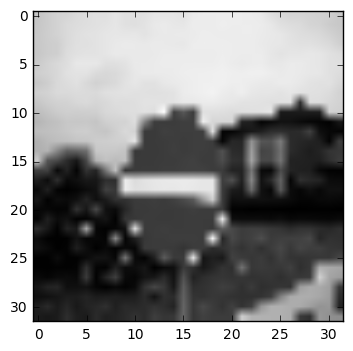

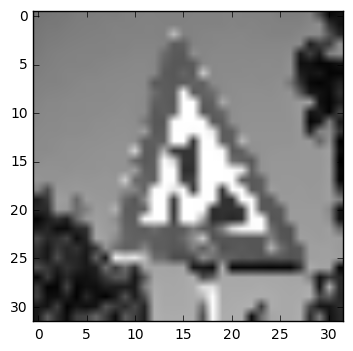

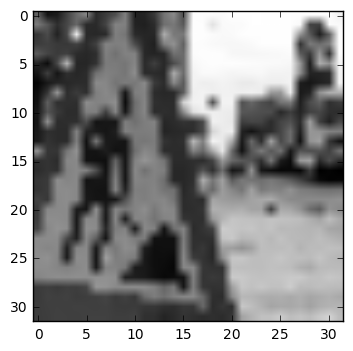

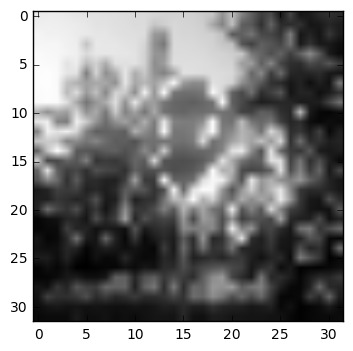

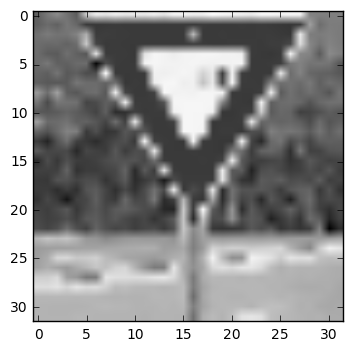

In [48]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

test_folder='/usr/local/mxnet/CarND-Traffic-Signs/test'
test_data=np.ndarray(shape=(5, 32, 32, 1), dtype=np.float32)
load_data=np.ndarray(shape=(32, 32, 3), dtype=np.float32)
size=32,32
c=0
for t in os.listdir(test_folder):
    image_t=os.path.join(test_folder, t)
    test_img=mpimg.imread(image_t)
    load_data= cv2.resize(test_img, size) 
    post_test_img=grayscale(load_data)-norm
    plt.figure()
    plt.imshow(post_test_img, cmap='gray')
    test_data[c,:,:,0]=post_test_img
    c+=1
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
'''
[Add]:
The images I choose all have background objects, some even have very noisy/complicated background edges like trees.
'''

In [49]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session(graph=graph) as session:
    saver.restore(session, "/usr/local/mxnet/CarND-Traffic-Signs/model99.ckpt")
    print('Model Loaded')
    predicted_labels = np.ndarray(shape=(5, n_classes), dtype=np.float32)
    predicted_labels[:, :] = train_prediction.eval(feed_dict={tf_train_dataset : test_data[:,:,:,:], keep_prob : 1.0})
    print(predicted_labels)
    #with open('submission_softmax.csv', 'a') as f_handle:
    #    np.savetxt(f_handle, np.c_[test_name,predicted_labels], delimiter=',', comments = '',fmt='%s')
    session.close()

Model Loaded
[[  2.56313622e-04   2.54212786e-02   1.32050412e-03   1.19205308e-03
    1.67479404e-04   2.14400212e-03   4.07582236e-04   3.54508433e-04
    3.21482250e-04   7.51569751e-04   2.31393403e-03   1.85835862e-03
    3.30718141e-03   3.00909877e-01   8.25526076e-04   3.50717077e-04
    4.85047667e-06   2.48685572e-03   5.99926061e-05   5.60621484e-05
    5.60655171e-05   3.88548651e-04   4.60191222e-04   4.20747703e-04
    1.10300525e-05   8.65094066e-02   1.88789796e-04   1.25185426e-04
    1.02198124e-03   5.56507111e-01   3.96310323e-04   5.29646315e-03
    6.47470756e-07   1.59627398e-05   2.82574874e-05   2.45168019e-04
    1.68543644e-04   9.52762057e-05   1.31304166e-03   2.21542723e-04
    1.09583932e-04   1.77106704e-03   1.38985852e-04]
 [  4.80023664e-05   2.58398312e-03   4.58384631e-04   1.91749452e-04
    2.61039113e-05   7.74024375e-05   6.73478155e-07   1.32338791e-05
    1.82096994e-06   2.69692136e-05   1.00886409e-05   8.78238399e-03
    5.15204913e-04   1.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

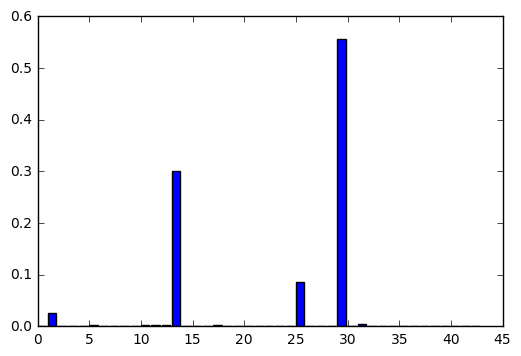

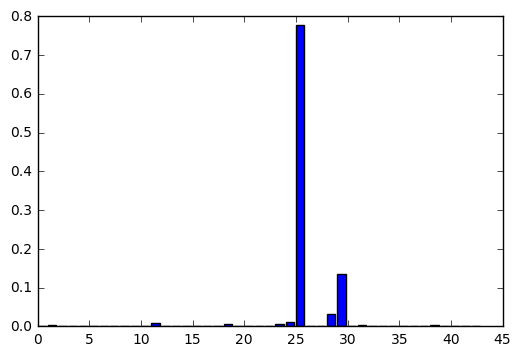

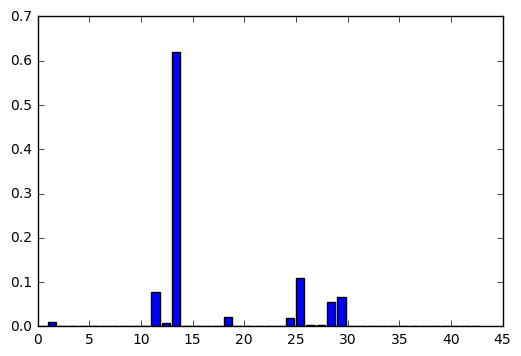

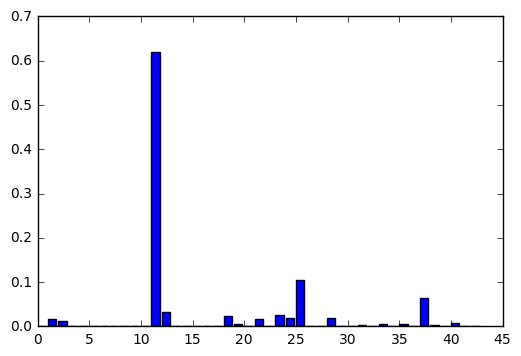

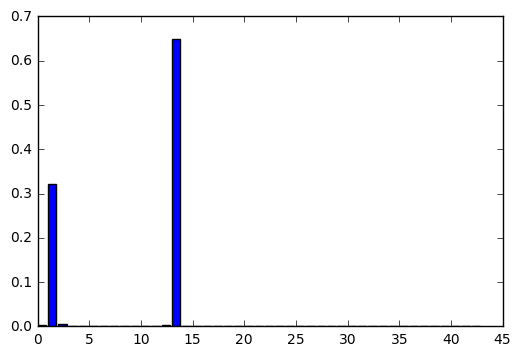

In [50]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

for i in range(5):
    plt.bar(range(n_classes),predicted_labels[i])
    plt.show()

In [ ]:
'''
The correct results should be [9,25,25,14,13], it is 60% accuracy. It is lower compared to test dataset result (88+%).

Failure Analysis:

1) Test image must be consistent regarding traffic sign rule. 

For example, I downloaded a US version "no entry" (the first image), it definitely cannot be correctly predicted. 
The training "no entry" (EU version) is white back color and honrizontal red line.

2) The traffic sign need to be dominant in the image.

If the test image is only small part of area, for example in the first test image, the house behind of the traffic sign 
is more dominant, the model will not work. 

It indicates that preprocessing to amplify the traffic sign only may help. 

So I did the experiment by cleaning the image:
'''

Model Loaded
[[  8.27317714e-10   3.26490806e-07   6.98314807e-07   1.88134294e-07
    1.06117824e-07   3.96551485e-08   1.09317590e-10   3.36340134e-09
    5.30337441e-10   1.86131601e-07   5.24036388e-08   1.88759719e-09
    5.49686604e-07   9.31111188e-08   9.99979019e-01   1.02380966e-08
    2.18377625e-11   2.30178784e-07   7.60237473e-09   3.81747477e-13
    5.27332134e-08   8.95861940e-10   2.75074546e-10   5.80894355e-09
    1.00461994e-09   4.50942451e-07   1.30562698e-08   2.97974319e-11
    2.09672404e-10   2.42695619e-09   2.15037918e-11   2.67544997e-11
    1.94591739e-11   4.02973046e-06   7.37928417e-07   1.15298008e-06
    7.80977643e-07   3.22316609e-08   9.82981601e-06   1.42436647e-06
    2.82743873e-08   2.24505570e-09   3.24771920e-09]]


TopKV2(values=array([[  9.99979019e-01,   9.82981601e-06,   4.02973046e-06]], dtype=float32), indices=array([[14, 38, 33]], dtype=int32))

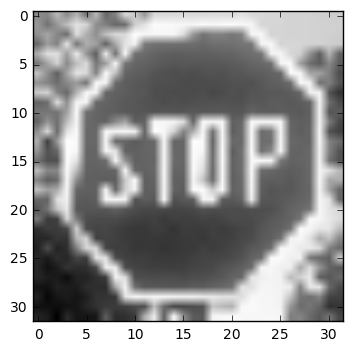

In [71]:
image_t='/usr/local/mxnet/CarND-Traffic-Signs/test/stop_clean.jpg'
test_data=np.ndarray(shape=(1, 32, 32, 1), dtype=np.float32)
load_data=np.ndarray(shape=(32, 32, 3), dtype=np.float32)
size=32,32

test_img=mpimg.imread(image_t)
load_data= cv2.resize(test_img, size) 
post_test_img=grayscale(load_data)-norm
plt.figure()
plt.imshow(post_test_img, cmap='gray')
test_data[0,:,:,0]=post_test_img

with tf.Session(graph=graph) as session:
    saver.restore(session, "/usr/local/mxnet/CarND-Traffic-Signs/model99.ckpt")
    print('Model Loaded')
    predicted_labels = np.ndarray(shape=(1, n_classes), dtype=np.float32)
    predicted_labels[:, :] = train_prediction.eval(feed_dict={tf_train_dataset : test_data[:,:,:,:], keep_prob : 1.0})
    print(predicted_labels)
    #with open('submission_softmax.csv', 'a') as f_handle:
    #    np.savetxt(f_handle, np.c_[test_name,predicted_labels], delimiter=',', comments = '',fmt='%s')
    session.close()
    
s = tf.Session()

s.run(tf.nn.top_k(tf.constant(predicted_labels), k=3))

In [ ]:
'''
Now it is able to be predicted correctly.
'''

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [51]:
s = tf.Session()

s.run(tf.nn.top_k(tf.constant(predicted_labels), k=3))

TopKV2(values=array([[ 0.55650711,  0.30090988,  0.08650941],
       [ 0.77896971,  0.13640186,  0.03085606],
       [ 0.61983734,  0.10951218,  0.07702059],
       [ 0.61863744,  0.10514762,  0.06486969],
       [ 0.64986998,  0.32222557,  0.00591641]], dtype=float32), indices=array([[29, 13, 25],
       [25, 29, 28],
       [13, 25, 11],
       [11, 25, 37],
       [13,  1,  2]], dtype=int32))